In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report#模型评估
from sklearn import linear_model
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn import preprocessing
#数据是否需要标准化
scale=False

In [15]:
data=pd.read_csv('LR-testSet.csv',header=None)

data=data.values
x_data=data[:,:-1]
y_data=data[:,-1]

print(x_data)
print(y_data)
print(y_data.shape)

[[-1.7612000e-02  1.4053064e+01]
 [-1.3956340e+00  4.6625410e+00]
 [-7.5215700e-01  6.5386200e+00]
 [-1.3223710e+00  7.1528530e+00]
 [ 4.2336300e-01  1.1054677e+01]
 [ 4.0670400e-01  7.0673350e+00]
 [ 6.6739400e-01  1.2741452e+01]
 [-2.4601500e+00  6.8668050e+00]
 [ 5.6941100e-01  9.5487550e+00]
 [-2.6632000e-02  1.0427743e+01]
 [ 8.5043300e-01  6.9203340e+00]
 [ 1.3471830e+00  1.3175500e+01]
 [ 1.1768130e+00  3.1670200e+00]
 [-1.7818710e+00  9.0979530e+00]
 [-5.6660600e-01  5.7490030e+00]
 [ 9.3163500e-01  1.5895050e+00]
 [-2.4205000e-02  6.1518230e+00]
 [-3.6453000e-02  2.6909880e+00]
 [-1.9694900e-01  4.4416500e-01]
 [ 1.0144590e+00  5.7543990e+00]
 [ 1.9852980e+00  3.2306190e+00]
 [-1.6934530e+00 -5.5754000e-01]
 [-5.7652500e-01  1.1778922e+01]
 [-3.4681100e-01 -1.6787300e+00]
 [-2.1244840e+00  2.6724710e+00]
 [ 1.2179160e+00  9.5970150e+00]
 [-7.3392800e-01  9.0986870e+00]
 [-3.6420010e+00 -1.6180870e+00]
 [ 3.1598500e-01  3.5239530e+00]
 [ 1.4166140e+00  9.6192320e+00]
 [-3.86323

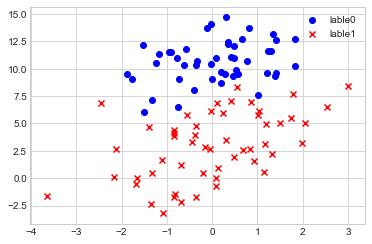

In [6]:
#画图
def plot():
    x0=[]
    x1=[]
    y0=[]
    y1=[]
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0=plt.scatter(x0,y0,c='b',marker='o')
    scatter1=plt.scatter(x1,y1,c='r',marker='x')
    plt.legend(handles=[scatter0,scatter1],labels=['lable0','lable1'],loc='best')
            
plot()

In [9]:
logistic=linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

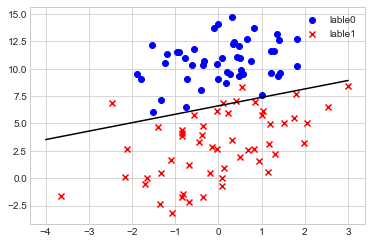

In [13]:
if scale==False:
    plot()
    x_test=np.array([[-4],[3]])
    y_test=(-logistic.intercept_-x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
    plt.plot(x_test,y_test,'k')

In [16]:
predictions=logistic.predict(x_data)
print(predictions)
print(classification_report(y_data,predictions))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0.]
             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96        47
        1.0       1.00      0.92      0.96        53

avg / total       0.96      0.96      0.96       100

